Installation de torchvision

In [ ]:
!pip install tensorflow

 GPUs disponibles : 0
 Pas de GPU détecté - utilisation du CPU
Nombre de classes : 206
Exemples de classes : ['Grape White 3', 'Pear Stone 1', 'Salak 1', 'Tomato 1', 'Nectarine Flat 1', 'Apple 13', 'Pomegranate 1', 'Nut 1', 'Chestnut 1', 'Cucumber 4']
Images d'entraînement : 103993
Images de test : 34711
Found 103993 files belonging to 206 classes.
Found 34711 files belonging to 206 classes.
Nombre de classes détectées : 206


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    10,240,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 206)            │        52,942 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,312,590 (39.34 MB)

 Trainable params: 10,312,590 (39.34 MB)

 Non-trainable params: 0 (0.00 B)

Entraînement en cours...
Epoch 1/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1330s 204ms/step - accuracy: 0.8062 - loss: 0.8514
Epoch 2/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1339s 206ms/step - accuracy: 0.9880 - loss: 0.0451
Epoch 3/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1361s 209ms/step - accuracy: 0.9934 - loss: 0.0288
Epoch 4/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1362s 203ms/step - accuracy: 0.9944 - loss: 0.0280
Epoch 5/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1417s 215ms/step - accuracy: 0.9961 - loss: 0.0214
Epoch 6/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1337s 205ms/step - accuracy: 0.9956 - loss: 0.0239
Epoch 7/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1333s 205ms/step - accuracy: 0.9960 - loss: 0.0284
Epoch 8/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1319s 203ms/step - accuracy: 0.9966 - loss: 0.0240
Epoch 9/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1336s 205ms/step - accuracy: 0.9980 - loss: 0.0185
Epoch 10/10
6500/6500 ━━━━━━━━━━━━━━━━━━━━ 1340s 206ms/step - accuracy: 0.9972 - loss: 0.0251
Évaluation sur le jeu de test...
 Précision 

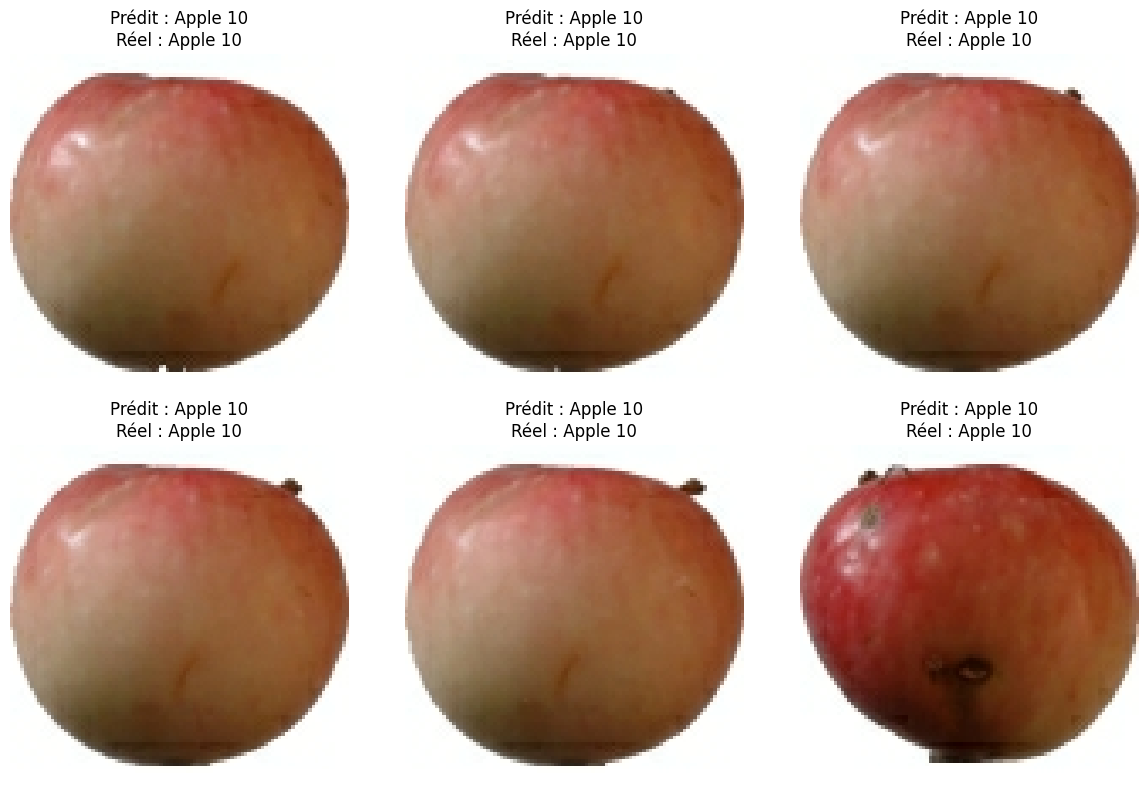

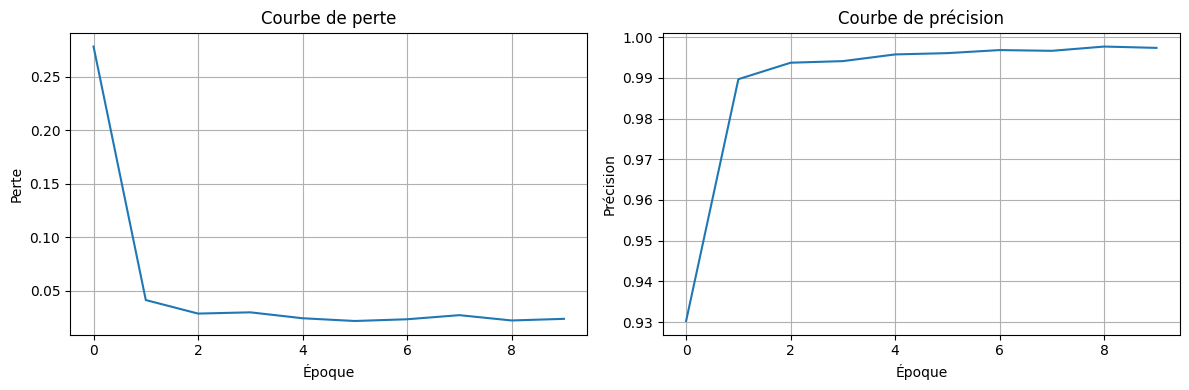

In [9]:
# ======================================================
# 1. Problématique
# ------------------------------------------------------
# Objectif : classer automatiquement une image de fruit parmi +100 classes.
# Application classique de la classification d’images avec un CNN entraîné sur des images RGB 100x100.

# ======================================================
# 2. Chargements & environnement
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import os

# Vérifier les GPUs disponibles
print(" GPUs disponibles :", len(tf.config.experimental.list_physical_devices('GPU')))
if tf.config.experimental.list_physical_devices('GPU'):
    print(" GPU détecté - utilisation du GPU")
else:
    print(" Pas de GPU détecté - utilisation du CPU")

# Dézipper le dataset si nécessaire

!unzip -q /content/fruits-360.zip -d /content/

# ======================================================
# 3. Présentation du dataset
data_dir = "/content/fruits-360"
train_dir = os.path.join(data_dir, "Training")
test_dir = os.path.join(data_dir, "Test")

classes = os.listdir(train_dir)
print("Nombre de classes :", len(classes))
print("Exemples de classes :", classes[:10])

total_train = sum([len(os.listdir(os.path.join(train_dir, c))) for c in classes])
total_test = sum([len(os.listdir(os.path.join(test_dir, c))) for c in os.listdir(test_dir)])

print("Images d'entraînement :", total_train)
print("Images de test :", total_test)

# ======================================================
# 4. Préparation et nettoyage des données
img_height, img_width = 100, 100
batch_size = 16

# Chargement des images d'entraînement
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    validation_split=0.0,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

# Chargement des images de test
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    validation_split=0.0,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

# Noms de classes
class_names = train_dataset.class_names
num_classes = len(class_names)
print("Nombre de classes détectées :", num_classes)

# Normalisation des images [-1, 1]
def normalize_img(image, label):
    return (tf.cast(image, tf.float32) / 127.5) - 1, label

train_dataset = train_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test_dataset.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)

# Optimisation du chargement
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# ======================================================
# 5. Création du modèle CNN
def create_fruit_cnn(num_classes):
    model = keras.Sequential([
        layers.Conv2D(32, 3, padding='same', activation='relu', input_shape=(100, 100, 3)),
        layers.MaxPooling2D(2),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(num_classes)
    ])
    return model

model = create_fruit_cnn(num_classes)

# Compilation
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Affichage
model.summary()

# ======================================================
# 6. Entraînement
print("Entraînement en cours...")
history = model.fit(
    train_dataset,
    epochs=10,
    verbose=1
)

# ======================================================
# 🧪 7. Évaluation
print("Évaluation sur le jeu de test...")
test_loss, test_accuracy = model.evaluate(test_dataset, verbose=0)
print(f" Précision sur test : {test_accuracy * 100:.2f}%")

# ======================================================
# 8. Affichage des prédictions
def show_predictions():
    plt.figure(figsize=(12, 8))

    for images, labels in test_dataset.take(1):
        predictions = model.predict(images, verbose=0)
        predicted_classes = tf.argmax(predictions, axis=1)

        for idx in range(min(6, len(images))):
            img = (images[idx].numpy() + 1) / 2
            img = np.clip(img, 0, 1)

            plt.subplot(2, 3, idx+1)
            plt.imshow(img)
            plt.title(f"Prédit : {class_names[predicted_classes[idx]]}\nRéel : {class_names[labels[idx]]}")
            plt.axis("off")
        break

    plt.tight_layout()
    plt.show()

show_predictions()

# ======================================================
# 9. Historique d'entraînement
def plot_training_history():
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title('Courbe de perte')
    plt.xlabel('Époque')
    plt.ylabel('Perte')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.title('Courbe de précision')
    plt.xlabel('Époque')
    plt.ylabel('Précision')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history()


# ======================================================
# 10. Enregistrement
model.save("/content/fruit_classifier_model.h5")